       Unnamed: 0       Age  Annual_Income  Delay_from_due_date  \
0               0  0.056860       0.083668             0.111111   
1               2  0.000000       0.083668             0.111111   
2               3  0.056860       0.083668             0.138889   
3               6  0.056860       0.083668             0.111111   
4               9  0.057404       0.192389             0.166667   
...           ...       ...            ...                  ...   
69835       99991  0.057513       0.089810             0.527778   
69836       99994  0.057078       0.225427             0.347222   
69837       99995  0.057078       0.225427             0.388889   
69838       99996  0.057078       0.225427             0.319444   
69839       99997  0.057078       0.225427             0.444444   

       Num_of_Delayed_Payment  Outstanding_Debt  Credit_History_Age  \
0                    0.002273          0.162020            0.652819   
1                    0.002273          0.162020      

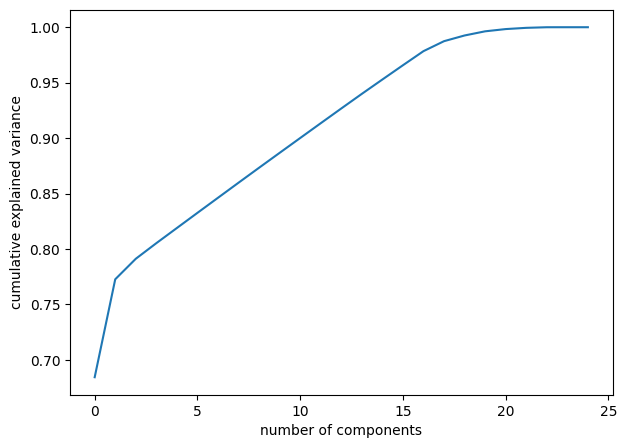

         0         1         2         3         4         5         6   \
0  0.758541 -0.773613 -0.035185 -0.090540 -0.010458  0.043380 -0.374975   
1 -1.238313 -0.841444  0.019733 -0.094205 -0.010815  0.045071 -0.371687   
2 -2.236991 -0.871857  0.035673 -0.096107 -0.010924  0.046166 -0.370837   
3 -2.236606 -0.876984  0.052226 -0.096325 -0.010843  0.045864 -0.369832   
4  2.760665 -0.738433 -0.024557 -0.106844 -0.635206 -0.536403  0.424712   

         7         8         9         10        11        12        13  \
0 -0.665290  0.544871  0.126687  0.032366 -0.016664 -0.045531 -0.052639   
1 -0.666637  0.547165  0.127583  0.034072 -0.015994 -0.051982 -0.054112   
2 -0.666949  0.548570  0.128254  0.034909 -0.015975 -0.055424 -0.054896   
3 -0.667421  0.548187  0.128013  0.035302 -0.015599 -0.055050 -0.054929   
4  0.032680  0.159058  0.059905  0.037172 -0.000872 -0.028050 -0.043574   

         14  
0 -0.108677  
1 -0.104612  
2 -0.102314  
3 -0.102419  
4 -0.090261  
______________

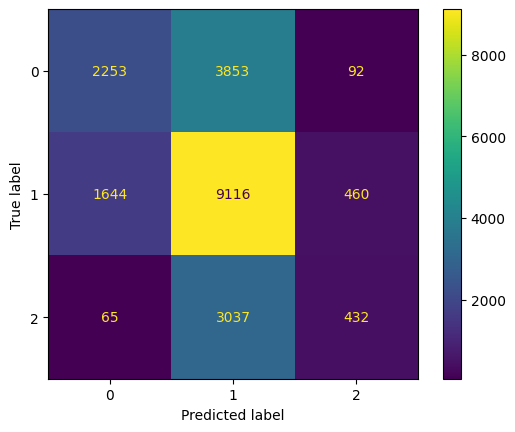

report:               precision    recall  f1-score   support

           1       0.57      0.36      0.44      6198
           2       0.57      0.81      0.67     11220
           3       0.44      0.12      0.19      3534

    accuracy                           0.56     20952
   macro avg       0.53      0.43      0.43     20952
weighted avg       0.55      0.56      0.52     20952

tp: 2253
fp: 1644
fn: 3853
tn: 9116
Accuracy: 0.6740780267994783
Precision: 0.5781370284834488
Recall: 0.3689813298395021
F1-Score: 0.45046486054183743


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

df = pd.read_csv("cleaned_data.csv", sep=",", encoding='utf-8')
print(df)
print(df.columns)

exclude_filter = ~df.columns.isin(['Unnamed: 0', 'Credit_Score'])

pca = PCA().fit(df.loc[:, exclude_filter])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)
plt.show()

pca = PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(df.loc[:, exclude_filter])
principal_df = pd.DataFrame(data=principal_components)
print(principal_df.head())

X_train, X_test, Y_train, Y_test = train_test_split(principal_df, df['Credit_Score'], test_size=0.3, random_state=42)


print("___________________________")

logreg = LogisticRegression(random_state=100)
logreg.fit(X_train, Y_train)

pred = logreg.predict(X_test)

matrix = confusion_matrix(Y_test, pred)
ConfusionMatrixDisplay(matrix).plot()
plt.show()

report = classification_report(Y_test, pred)

print(f"report: {report}")

# To jest obliczane dla lewego fórnego kwadratu

tp = matrix[0][0]
tn = matrix[1][1]
fn = matrix[0][1]
fp = matrix[1][0]

print(f"tp: {tp}")
print(f"fp: {fp}")
print(f"fn: {fn}")
print(f"tn: {tn}")


accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

precision = tp / (tp + fp)
print(f"Precision: {precision}")

recall = tp / (tp + fn)
print(f"Recall: {recall}")

fscore = 2 * ((precision * recall) / (precision + recall))
print(f"F1-Score: {fscore}")